in [`gmx editconf`](https://manual.gromacs.org/current/onlinehelp/gmx-editconf.html) command<br>
`-d` arg determined the Distance between the solute and the box<br>
we want fix the system atom number by adjust the `-d` value<br>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm

In [2]:
pdbid = "2jpz"

In [3]:
def get_n_sol(d):
    !cp topol.top.bak1 topol.top
    !gmx editconf -f {pdbid}.gro.pdb -o {pdbid}_dode.pdb -c yes -d {d} -bt dodecahedron > /dev/null 2>&1
    !gmx solvate -cp {pdbid}_dode.pdb -cs spc216.gro -o {pdbid}_solv.pdb -p topol.top > /dev/null 2>&1
    sol = !grep "SOL" topol.top
    n_sol = int(sol[0].split()[1])
    return n_sol

In [4]:
def get_box(d):
    !cp topol.top.bak1 topol.top
    !gmx editconf -f {pdbid}.gro.pdb -o {pdbid}_dode.pdb -c yes -d {d} -bt dodecahedron >editconf.txt 2>&1
    volume = !grep "new box volume" editconf.txt
    volume = float(volume[0].split()[4])
    return volume

In [5]:
def get_n_atoms(d):
    !cp topol.top.bak1 topol.top
    !gmx editconf -f {pdbid}.gro.pdb -o {pdbid}_dode.pdb -c yes -d {d} -bt dodecahedron > /dev/null 2>&1
    !gmx solvate -cp {pdbid}_dode.pdb -cs spc216.gro -o {pdbid}_solv.pdb -p topol.top >solvate.txt 2>&1
    atoms = !grep "Solvent box contains" solvate.txt
    n_atoms = int(atoms[0].split()[3])
    return n_atoms

In [6]:
!rm \#*

In [7]:
d2volume = {}
for d in tqdm(np.linspace(1.26, 1.28, 51)):
    volume = get_box(d)
    d2volume[d] = volume

100%|██████████| 51/51 [00:26<00:00,  1.92it/s]


Text(0, 0.5, 'volume')

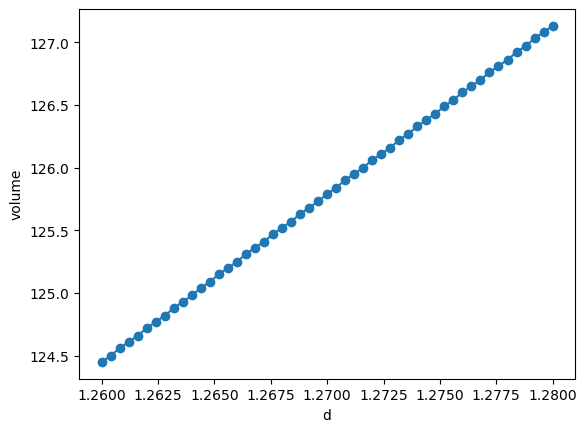

In [8]:
plt.plot(d2volume.keys(), d2volume.values())
plt.scatter(d2volume.keys(), d2volume.values())
plt.xlabel('d')
plt.ylabel('volume')

In [9]:
d2n_sol = {}
for d in tqdm(np.linspace(1.275, 1.285, 51)):
    n_sol = get_n_sol(d)
    d2n_sol[d] = n_sol

100%|██████████| 51/51 [00:43<00:00,  1.18it/s]


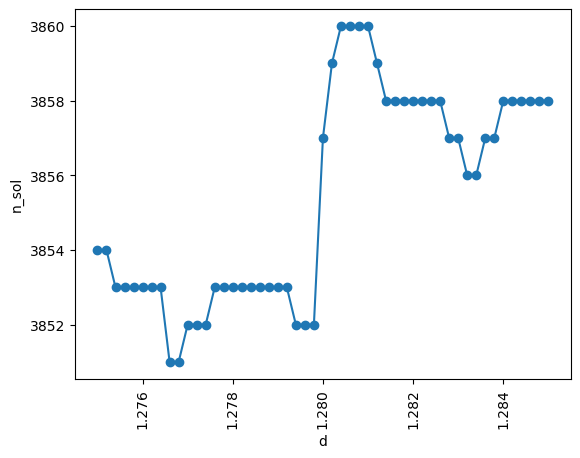

In [10]:
plt.plot(d2n_sol.keys(), d2n_sol.values())
plt.scatter(d2n_sol.keys(), d2n_sol.values())
plt.xlabel('d')
plt.ylabel('n_sol')
plt.xticks(rotation=90)
plt.show()